# Decision Trees (Árvores de Decisão)
## Curso Data Science and Machine Learning
### DataSet: https://www.kaggle.com/datasets/uciml/iris
### Course: https://www.youtube.com/watchv=a0JF0EPVp_U&list=PLbnAsJ6zlidu7_eG2XJpfbHmVQy22BrXv&index=28

### Importação dos Módulos Necessários:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import Image
%matplotlib inline

### Importar DataFrame:

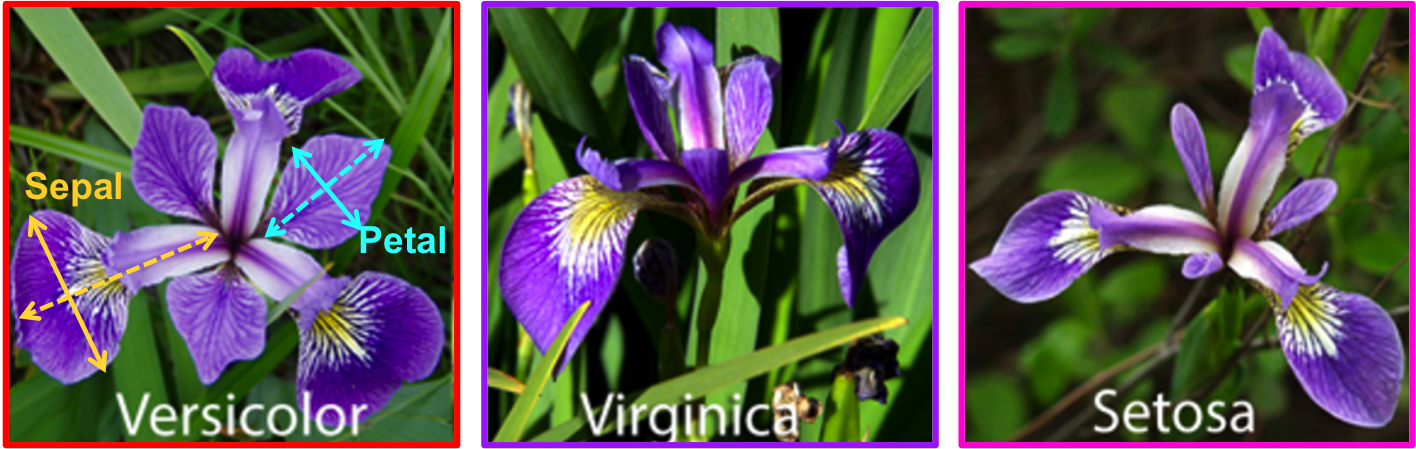

In [30]:
# Importação do DataFrame do conjunto de dados Iris
# Exibe a imagem do conjunto de dados Iris
Image("https://sundeeppothula1993.github.io/ARTML//assets/img/iris.png")

In [3]:
df = pd.read_csv("Iris.csv", sep=',')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Preparando os Dados:

In [4]:
# Preparação dos dados
# Fatoriza a coluna "Species" para criar uma nova coluna "SpeciesCat" com valores numéricos
idCat, cat = pd.factorize(df["Species"])
idCat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [5]:
cat

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')

In [6]:
df['SpeciesCat'] = idCat

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SpeciesCat
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [8]:
# Remoção das colunas "Id" e "Species"
del df['Id']
del df["Species"]

In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,SpeciesCat
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Análise Exploratória

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   SpeciesCat     150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [11]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,SpeciesCat
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<AxesSubplot:xlabel='SpeciesCat', ylabel='count'>

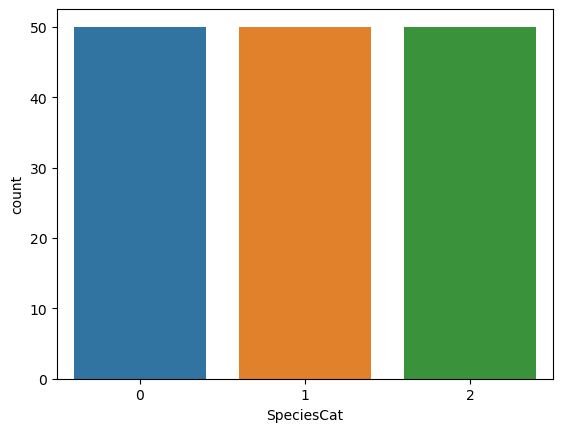

In [12]:
# Criação de um gráfico de contagem da coluna "SpeciesCat"

# sns.countplot(df["SpeciesCat"]) <- essa forma não funciona mais
# sns.countplot(x='SpeciesCat', data=df).set_xlabel('Label do Eixo X')
sns.countplot(x='SpeciesCat', data=df)

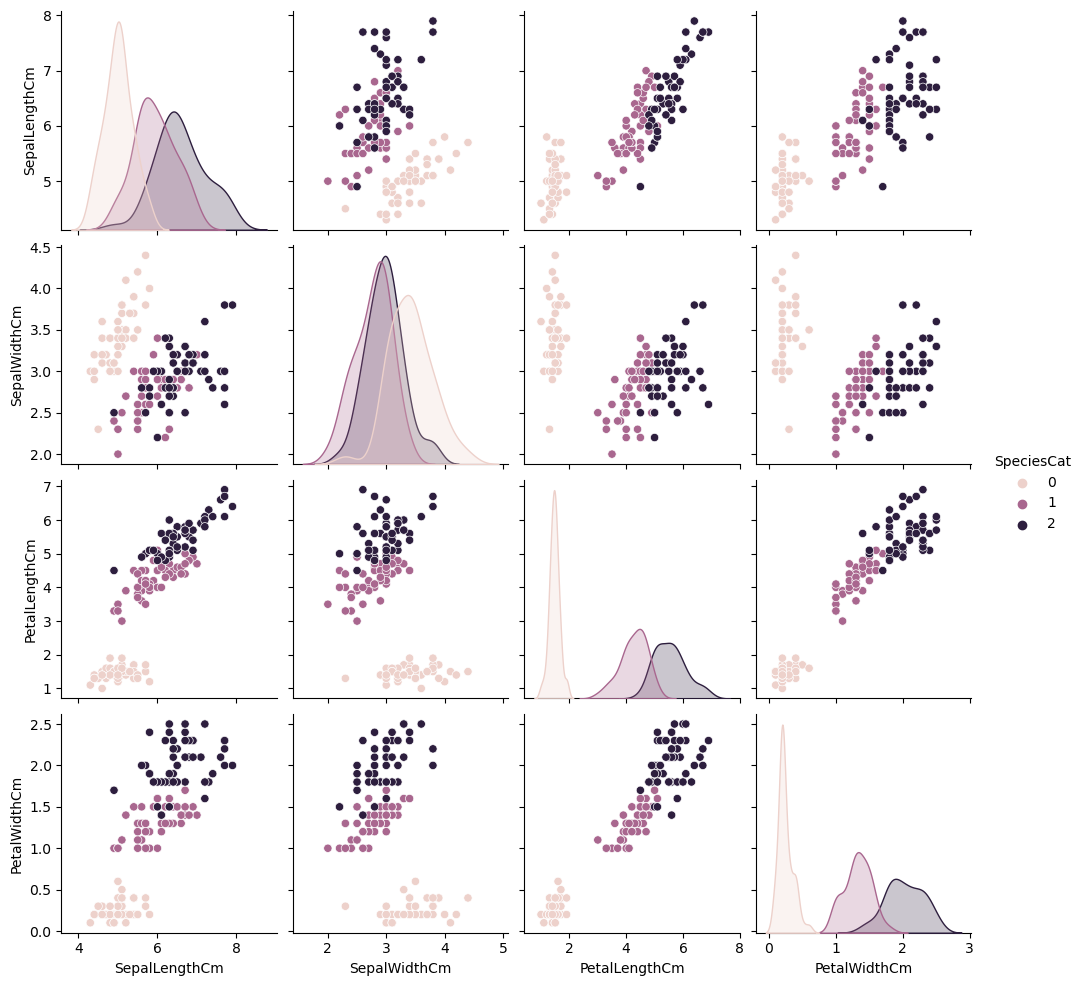

In [13]:
# Criação de um gráfico de pares coloridos com base na coluna "SpeciesCat"
sns.pairplot(df, hue="SpeciesCat")

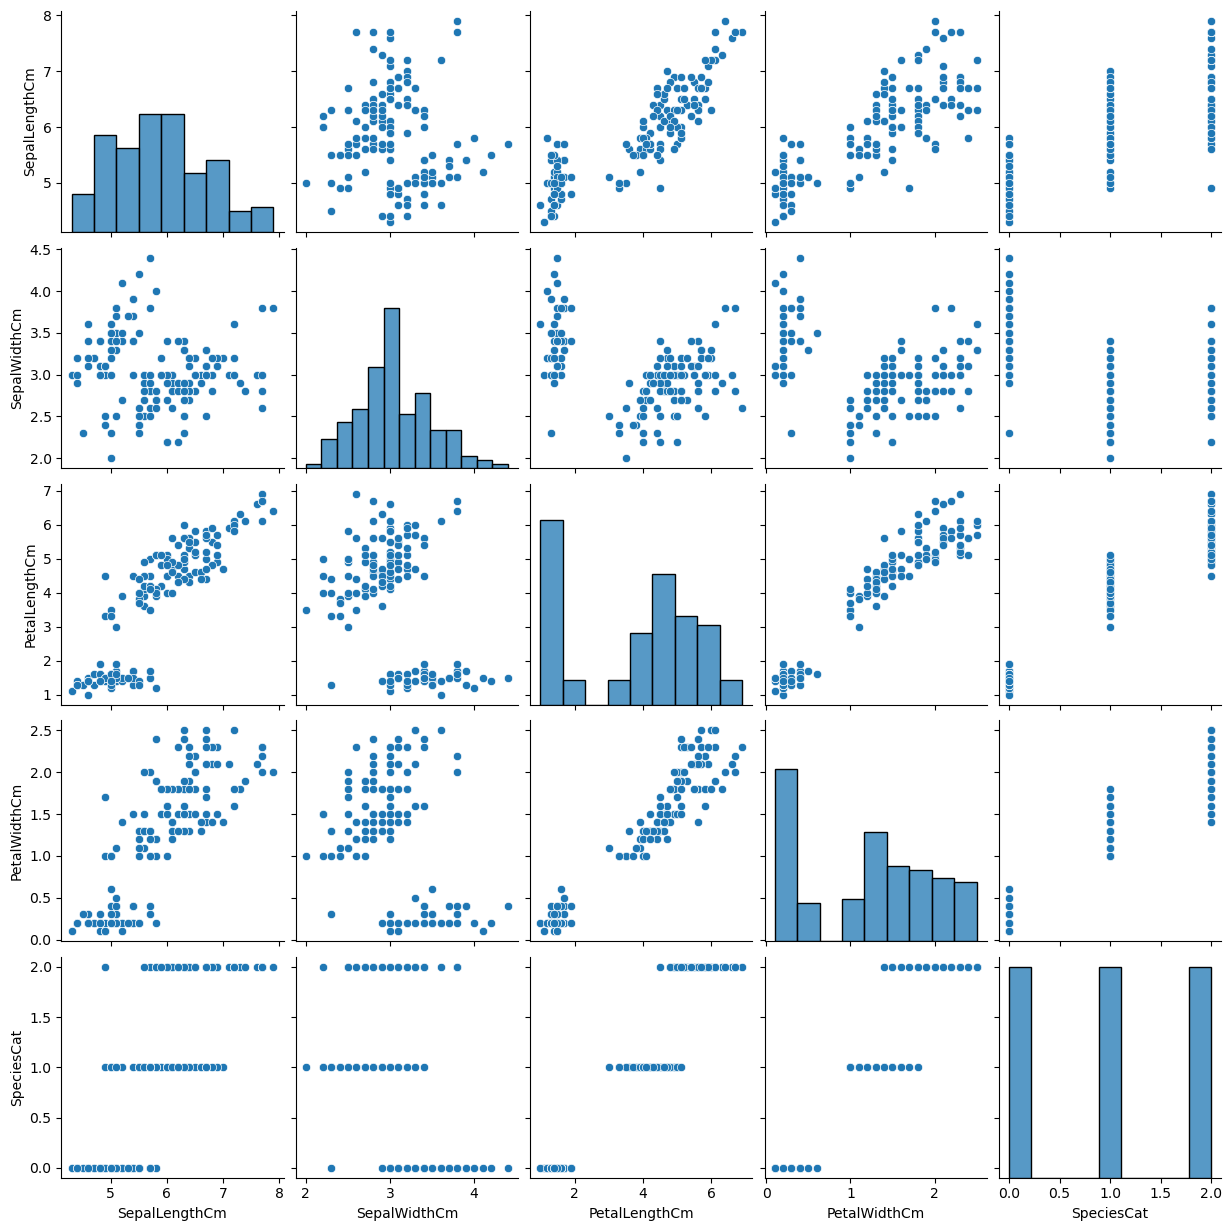

In [14]:
# Criação de um gráfico de pares para todas as variáveis
sns.pairplot(df)

C:\Users\kadek\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='SpeciesCat', ylabel='PetalWidthCm'>

C:\Users\kadek\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


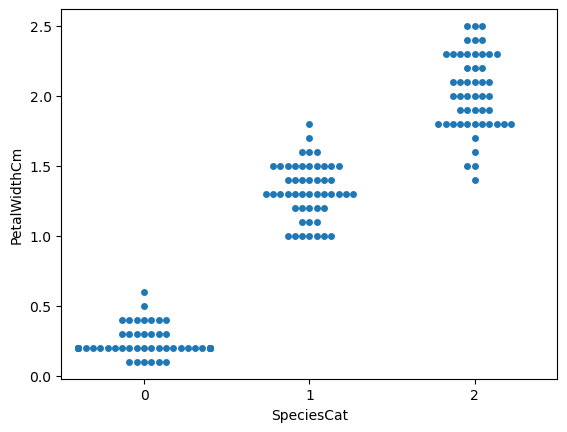

In [15]:
# Criação de um gráfico de "swarmplot" para a relação entre "SpeciesCat" e "PetalWidthCm"
sns.swarmplot(x="SpeciesCat", y="PetalWidthCm", data=df)

<AxesSubplot:xlabel='SpeciesCat', ylabel='PetalLengthCm'>

C:\Users\kadek\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


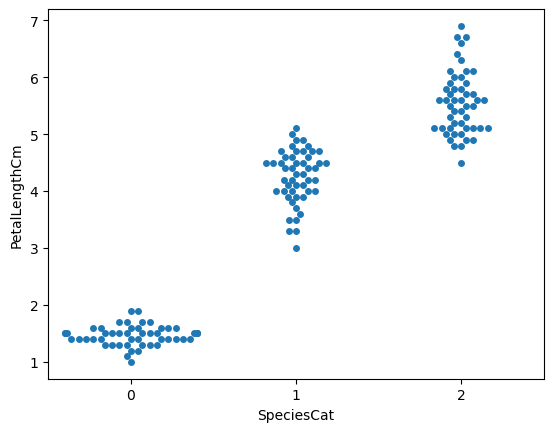

In [16]:
# Criação de um gráfico de "swarmplot" para a relação entre "SpeciesCat" e "PetalLengthCm"
sns.swarmplot(x="SpeciesCat", y="PetalLengthCm", data=df)

### Divisão dos Dados em treino e testes:

In [17]:
X = df.drop("SpeciesCat", axis=1)
y = df["SpeciesCat"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)

In [18]:
X_train.shape

(120, 4)

In [19]:
y_train.shape

(120,)

### Escalonamento dos Dados

#### Uma das vantagens das árvores de decisão é que elas não exigem o escalonamento dos dados.

### Escolhendo os melhores hiperparâmetros:

In [20]:
# Escolha dos melhores hiperparâmetros usando GridSearchCV

params = [
    {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 2, 4, 8, 10, 30, 50, 100]
    }
]
ins = DecisionTreeClassifier(max_depth=10)
# grid_search = GridSearchCV(ins, params, cv=5, scoring = 'accuracy')
# grid_search.fit(X_train, y_train)
# grid_search.best_params_

### Ajustando e fazendo previsões:

In [21]:
# Ajuste do modelo de árvore de decisão aos dados de treinamento:
ins.fit(X_train, y_train)

# Faz previsões com base nos dados de teste:
pred = ins.predict(X_test)
pred[:5]

array([2, 0, 2, 0, 2], dtype=int64)

In [22]:
y_test[:5]

128    2
11     0
118    2
15     0
123    2
Name: SpeciesCat, dtype: int64

In [23]:
# Avaliação da precisão do modelo com base nos dados de teste:
ins.score(X_test, y_test)

0.9666666666666667

In [24]:
# Validação cruzada do modelo com base nos dados de teste:
cross = cross_val_score(ins, X_test, y_test, cv=5, scoring="accuracy")
final = sum(cross) / len(cross)
final

0.9666666666666668

In [25]:
# Exibe um relatório de classificação:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91         6
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [26]:
# Exibe a matriz de confusão:
print(confusion_matrix(y_test, pred))

[[11  0  0]
 [ 0  5  1]
 [ 0  0 13]]


In [27]:
# Faz previsões com um novo conjunto de dados
newX = pd.DataFrame([
    [4.1,2,2,3]
], columns=X.columns)
newX

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,4.1,2,2,3


In [28]:
cat

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')

In [29]:
pred = ins.predict(newX)
pred[:5]

array([0], dtype=int64)